# Interpolation vs. Regression

::::::{margin}
:::::{grid}
::::{grid-item-card}
:class-header: bg-light
Lineare Interpolation, Herleitung, Formel | Mathe by Daniel Jung

<iframe width="200" height="113" src="https://www.youtube.com/embed/KYiIGZYrb9M?si=s_kiYrsBAeFq9hkW" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
::::
:::::
::::::

Interpolation und Anpassung (Regression) sind zwei verschiedene Methoden in der Datenanalyse und haben unterschiedliche Zwecke. Die Interpolation zielt darauf ab, fehlende Werte zwischen bekannten Datenpunkten zu schätzen, um eine kontinuierliche Funktion oder Kurve zu erstellen, die die vorhandenen Datenpunkte exakt durchläuft. Dies ist nützlich, wenn wir genaue Werte für bestimmte Zwischenpunkte benötigen und sicherstellen möchten, dass unsere Schätzung die vorhandenen Daten genau wiedergibt. Interpolation wird häufig in Bereichen wie Geoinformationssystemen verwendet, um topografische Karten zu erstellen, oder in der Bildverarbeitung, um Pixeldaten zu glätten.

Auf der anderen Seite dient die Anpassung oder Regression dazu, den besten passenden mathematischen Ausdruck (z. B. eine Gerade, Parabel oder höhergradige Funktion) an vorhandene Daten anzupassen. Dabei wird nicht erwartet, dass die Kurve die Datenpunkte exakt durchläuft, sondern dass sie den allgemeinen Trend der Daten wiedergibt. Regression wird verwendet, um Beziehungen zwischen Variablen zu modellieren, Vorhersagen zu treffen oder Muster in den Daten zu identifizieren. Zum Beispiel kann die lineare Regression dazu verwendet werden, den Zusammenhang zwischen zwei Variablen zu analysieren, wie den Einfluss von Werbeausgaben auf den Umsatz eines Unternehmens.

Insgesamt kann gesagt werden, dass Interpolation verwendet wird, um fehlende Werte zwischen bekannten Punkten genau zu schätzen, während die Regression dazu dient, mathematische Modelle zur Beschreibung von Trends oder Beziehungen zwischen Variablen auf Grundlage vorhandener Daten zu entwickeln. Beide Techniken haben wichtige Anwendungsgebiete in Wissenschaft, Ingenieurwesen und Datenanalyse, je nach den spezifischen Anforderungen eines Problems.

* **Regression**: Untersuchung der *Korrelation* von Datenpunkten ohne Messfehler mit angenommenem Zusammenhang
* **Fit/Anpassung**: wie die Regression, allerdings unter Berücksichtigung von Messfehlern. 
* **Interpolation**: Hierbei handelt es sich nicht um eine Regression bzw. Approximation. Anstelle eines funktionalen Zusammenhangs, der an die Messwerte angenähert wird, verwendet man Polynome hohen Grades, um eine analytische Funktion zu beschreiben, die **exakt** durch alle Messpunkte geht. Für eine große Anzahl von Messwerten wird die Interpolationsfunktion sehr schnell unhandlich. 

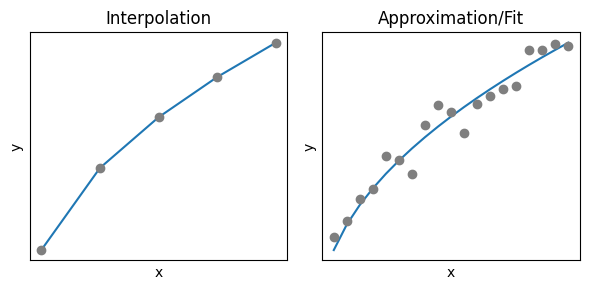

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import interpolate

# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(6,3)) # Plot-Größe
#plt.xkcd()
plt.rcParams['font.size'] = 10; # Schriftgröße

# INTERPOLATION:
plt.subplot(1,2,1)
x = np.arange(10, 200, 40)
y = np.sqrt(x)
plt.plot(x,y,'o', color='tab:gray')

tck = interpolate.splrep(x, y, s=0)
yfit = interpolate.splev(x, tck, der=0)

plt.plot(x,yfit, zorder=0, color = 'tab:blue')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolation')
plt.xticks([])
plt.yticks([])

# ANPASSUNG:
plt.subplot(1,2,2)
x = np.arange(10, 200, 10)
stoerung = np.random.normal(scale=0.6, size=x.shape)
y = np.sqrt(x)+stoerung
plt.plot(x,y,'o', color='tab:gray')

# Anpassung / Fit:
def anpassung(x, a):
    return a*np.sqrt(x)
popt, pcov = curve_fit(anpassung, x, y)
plt.plot(x,anpassung(x,*popt), zorder=0, color = 'tab:blue')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Approximation/Fit')
plt.xticks([])
plt.yticks([])

plt.tight_layout()

## Lineare Interpolation

In der Interpolation wird oft der funktionale Zusammenhang $f(x)$ zwischen den Messgrößen $x$ und $y$ nicht explizit gegeben. Stattdessen werden lediglich einige Stützstellen gemessen, und man möchte den Wert von $y$ für einen Zwischenpunkt $x$ schätzen, der zwischen den vorhandenen Datenpunkten liegt. Dies ist besonders nützlich, wenn wir kontinuierliche Informationen aus diskreten Daten extrahieren möchten.

Angenommen, wir haben zwei Messpunkte:

$$f(2) = 4$$

$$f(3) = 25$$

Nun möchten wir den Wert von $f(2,4)$ schätzen. Bei der linearen Interpolation wird eine Gerade, auch als Sekante bezeichnet, zwischen diesen beiden Punkten gezeichnet. Diese Sekante wird durch eine lineare Funktion $f(x) = mx + b$ beschrieben, die durch die beiden gegebenen Punkte definiert ist.

Die Steigung der Sekante, $m$, kann durch den Anstieg zwischen den Punkten berechnet werden:

$$m = \frac{y_2 - y_1}{x_2 - x_1} = \frac{f(3) - f(2)}{3 - 2} = 21$$

Alternativ kann die Steigung auch durch den gesuchten Punkt $(x, y)$ und einen der gegebenen Punkte, zum Beispiel $y_1$, definiert werden:

$$m = \frac{y - y_1}{x - x_1} = \frac{y - f(2)}{x - 2}$$

Da beide Steigungen identisch sind, können wir die Gleichungen gleichsetzen:

$$\frac{y - f(2)}{x - 2} = \frac{f(3) - f(2)}{3 - 2}$$

Daraus ergibt sich eine Formel zur Berechnung des geschätzten Werts $y$:

$$y = f(2) + \frac{x - 2}{3 - 2} \cdot (f(3) - f(2))$$

Indem wir die gegebenen Werte in diese Formel einsetzen, erhalten wir eine Näherung für $y$:

$$y = 4 + \frac{2,4 - 2}{3 - 2} \cdot (25 - 4) = 12{,}4$$

Die lineare Interpolation ermöglicht es uns also, den Wert einer Funktion zwischen zwei gegebenen Punkten abzuschätzen und kontinuierliche Informationen aus diskreten Daten zu gewinnen.

In [2]:
x1 = 2
y1 = 4

x2 = 3
y2 = 25

x = 2.4
print(y1 + (x-x1)/(x2-x1) * (y2-y1))

12.399999999999999


```{warning}
In solchen Fällen können $y$-Werte erfolgreich approximiert werden, solange die $x$-Werte eng beieinander liegen. Allerdings führt die Interpolation bei weit voneinander entfernten Werten zu erheblichen Fehlern.
```

## Was benutzt man wann und warum?

* **Interpolation**...
    * benutzt man bei wenigen Messwerten
    * benutzt man wenn keine Störung die Messung überlagert
    * ist eine analytische Kennlinie, die exakt durch die Messpunkte verläuft (siehe [Kennlinie](2_idealeKennlinie.ipynb))
    * berechnet man unter der Verwendung von z.B. Polynomen (z.B. spline-Methode)
    * ist bei großen Datenmengen sehr unhandlich
* **Approximation/Anpassung/Regression:**...
    * benutzt man bei vielen Messwerten
    * benutzt man bei überlagerten Störungen
    * benutzt man wenn die Interpolation unpraktisch ist
    * ist eine Linearkombination geeigneter analytischer Basisfunktionen
    * ist eine Anpassung eines physikalischen Modells an die Daten